<a href="https://colab.research.google.com/github/SANGUNDE/ML-/blob/main/binary_classification_with_bank_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the necessary libraries
import pandas as pd
import numpy as np

In [ ]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None )

In [ ]:
#using the .head() to have a view of our dataset
train_df.head(5)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7.0,no,no,cellular,25.0,aug,117.0,3.0,-1.0,0.0,unknown,0.0
1,1,38,blue-collar,married,secondary,no,514.0,no,no,unknown,18.0,jun,185.0,1.0,-1.0,0.0,unknown,0.0
2,2,36,blue-collar,married,secondary,no,602.0,yes,no,unknown,14.0,may,111.0,2.0,-1.0,0.0,unknown,0.0
3,3,27,student,single,secondary,no,34.0,yes,no,unknown,28.0,may,10.0,2.0,-1.0,0.0,unknown,0.0
4,4,26,technician,married,secondary,no,889.0,yes,no,cellular,3.0,feb,902.0,1.0,-1.0,0.0,unknown,1.0


In [ ]:
#having an overview of our data
train_df.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,12221.000000,12221.000000,12220.000000,12220.000000,12220.000000,12220.000000,12220.000000,12220.000000,12220.000000
mean,6110.000000,40.939776,1205.815630,15.957447,255.442144,2.549918,21.787316,0.294354,0.120376
std,3528.043154,10.129883,3189.354794,8.204641,270.443134,2.626621,76.138004,1.326303,0.325415
min,0.000000,18.000000,-2827.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,3055.000000,33.000000,0.000000,9.000000,92.000000,1.000000,-1.000000,0.000000,0.000000
50%,6110.000000,39.000000,622.000000,16.000000,132.000000,2.000000,-1.000000,0.000000,0.000000
75%,9165.000000,48.000000,1358.000000,21.000000,351.000000,3.000000,-1.000000,0.000000,0.000000
max,12220.000000,86.000000,98417.000000,31.000000,2452.000000,40.000000,842.000000,38.000000,1.000000


In [ ]:
#checking for missing values
train_df.isna().sum()

,0
id,0
age,0
job,0
marital,0
education,0
default,1
balance,1
housing,1
loan,1
contact,1


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12221 entries, 0 to 12220
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         12221 non-null  int64  
 1   age        12221 non-null  int64  
 2   job        12221 non-null  object 
 3   marital    12221 non-null  object 
 4   education  12221 non-null  object 
 5   default    12220 non-null  object 
 6   balance    12220 non-null  float64
 7   housing    12220 non-null  object 
 8   loan       12220 non-null  object 
 9   contact    12220 non-null  object 
 10  day        12220 non-null  float64
 11  month      12220 non-null  object 
 12  duration   12220 non-null  float64
 13  campaign   12220 non-null  float64
 14  pdays      12220 non-null  float64
 15  previous   12220 non-null  float64
 16  poutcome   12220 non-null  object 
 17  y          12220 non-null  float64
dtypes: float64(7), int64(2), object(9)
memory usage: 1.7+ MB


In [ ]:
train_df = train_df.dropna()

train_df.isna().sum()

,0
id,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0


In [ ]:
#we need to separate the categorical and numerical datasets
categorical_vals = train_df.select_dtypes(include='object')
numerical_vals = train_df.select_dtypes(include =('float64', 'int64'))

In [ ]:
#checking the dataset of categorical features
categorical_vals.head(5)

,job,marital,education,default,housing,loan,contact,month,poutcome
0,technician,married,secondary,no,no,no,cellular,aug,unknown
1,blue-collar,married,secondary,no,no,no,unknown,jun,unknown
2,blue-collar,married,secondary,no,yes,no,unknown,may,unknown
3,student,single,secondary,no,yes,no,unknown,may,unknown
4,technician,married,secondary,no,yes,no,cellular,feb,unknown


In [ ]:
#performing a hot one encoding of the categorical dataset

categorical_encoded = pd.get_dummies(categorical_vals , dtype='int', drop_first = 'True'  )

categorical_encoded.head(5)

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
numerical_vals.head(5)

,id,age,balance,day,duration,campaign,pdays,previous,y
0,0,42,7.0,25.0,117.0,3.0,-1.0,0.0,0.0
1,1,38,514.0,18.0,185.0,1.0,-1.0,0.0,0.0
2,2,36,602.0,14.0,111.0,2.0,-1.0,0.0,0.0
3,3,27,34.0,28.0,10.0,2.0,-1.0,0.0,0.0
4,4,26,889.0,3.0,902.0,1.0,-1.0,0.0,1.0


In [ ]:
#compiling our final dataset.

train_final = pd.concat([numerical_vals , categorical_encoded] ,
                       axis = 1)

train_final.head(10)

,id,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,42,7.0,25.0,117.0,3.0,-1.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,38,514.0,18.0,185.0,1.0,-1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,2,36,602.0,14.0,111.0,2.0,-1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,3,27,34.0,28.0,10.0,2.0,-1.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,4,26,889.0,3.0,902.0,1.0,-1.0,0.0,1.0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
5,5,24,1882.0,20.0,1010.0,3.0,-1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,6,39,0.0,21.0,90.0,1.0,-1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
7,7,50,1595.0,31.0,49.0,25.0,-1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
8,8,46,1463.0,4.0,50.0,1.0,-1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
9,9,39,25.0,8.0,119.0,1.0,-1.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
##Now we can separate our predictor from our predicated variables
train_X = train_final.drop(['id', 'y'], axis=1 )
train_y = train_final['y']

train_X.head(5)

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,42,7.0,25.0,117.0,3.0,-1.0,0.0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,38,514.0,18.0,185.0,1.0,-1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,36,602.0,14.0,111.0,2.0,-1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,27,34.0,28.0,10.0,2.0,-1.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,26,889.0,3.0,902.0,1.0,-1.0,0.0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.2,
                                                   )
X_train.shape, y_train.shape

((9776, 42), (9776,))

In [ ]:
from sklearn.linear_model import LogisticRegression
model_reg = LogisticRegression()
model_reg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model_reg.score(X_train, y_train)

0.9035392798690671

In [ ]:
#do the same operations on the test dataset
test_df.head(5)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1.0,0.0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1.0,0.0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1.0,0.0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1.0,0.0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1.0,0.0,unknown


In [ ]:
#check for null values
test_df.isnull().sum()


,0
id,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0


In [ ]:
categorical_vals_test = test_df.select_dtypes(include='object')
numerical_vals_test = test_df.select_dtypes(include=('int64', 'float64'))

In [ ]:
categorical_vals_test.head(5)

,job,marital,education,default,housing,loan,contact,month,poutcome
0,blue-collar,married,secondary,no,yes,no,unknown,may,unknown
1,management,married,tertiary,no,yes,no,cellular,apr,unknown
2,self-employed,married,primary,no,yes,yes,cellular,may,unknown
3,blue-collar,married,secondary,no,yes,yes,unknown,may,unknown
4,technician,single,secondary,no,yes,no,cellular,jul,unknown


In [ ]:
#one hot encoding the dataset

categorical_test_encoded = pd.get_dummies(categorical_vals_test, dtype='int', drop_first='True')
categorical_ds = categorical_test_encoded

categorical_ds.head(5)

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
numerical_vals_test.columns

Index(['id', 'age', 'balance', 'day', 'duration', 'campaign'], dtype='object')

In [ ]:
numerical_df = numerical_vals_test[['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous']]

numerical_df.head(5)

,age,balance,day,duration,campaign,pdays,previous
0,32,1397,21,224,1,-1.0,0.0
1,44,23,3,586,2,-1.0,0.0
2,36,46,13,111,2,-1.0,0.0
3,58,-1380,29,125,1,-1.0,0.0
4,28,1950,22,181,1,-1.0,0.0


In [ ]:
test_ds = pd.concat([ numerical_df, categorical_ds], axis=1
                   )

test_ds = test_ds.dropna()

test_ds.head(5)

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,32,1397,21,224,1,-1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,44,23,3,586,2,-1.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,36,46,13,111,2,-1.0,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,58,-1380,29,125,1,-1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,28,1950,22,181,1,-1.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
# making predictions and measuring the acuracy of our model

y_predictions = model_reg.predict(test_ds)

y_predictions

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
from sklearn.model_selection import cross_val_score

y_scores = cross_val_score(model_reg, X_train, y_train, cv=3,
                          )

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
y_scores

array([0.89812826, 0.9048788 , 0.90546347])

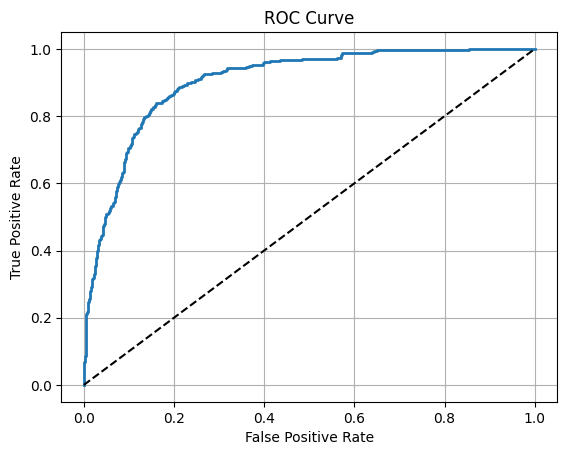

In [ ]:
#plotting a roc curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_predictions)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--')
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.show()

In [ ]:
test_ds.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [ ]:
# converting to csv
submission = pd.DataFrame({
    'id': range(len(y_predictions)),
    'y': y_predictions
})
submission.to_csv('submission.csv', index=False)

In [ ]:
import os
current_directory = os.getcwd()
print(f"The CSV file will be saved in: {current_directory}")

The CSV file will be saved in: /content


In [ ]:
display(submission.head(

))

,id,y
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
